# White Box - Supervised ML Project
__Name:__ Abdulrahman Abdulla Alali

__Topic Name:__ Behind the Hits: How Data Predicts Which Games Succeed (Regression)

## Introduction

### Business Challenge  
A video game development company is planning its next big game release and needs to better understand which titles will be successful in the global market. Success means strong worldwide sales, reaching many gamers across regions and platforms. With development and marketing costs high, the company wants to **optimize their investments** by predicting which games are likely to sell well — and thus allocate budget more intelligently.

### Dataset Overview  
The dataset used in this project — pulled from the Kaggle dataset *“Video Game Sales”* — contains records of video game titles with more than 100,000 copies sold. :contentReference[oaicite:0]{index=0} Key features include:

- Name, Platform, Year of release, Genre, Publisher  
- Regional sales: NA_Sales (North America), EU_Sales (Europe), JP_Sales (Japan), Other_Sales  
- Global_Sales: Total worldwide sales  
- Various metadata about the game that may influence performance  

## Problem Statement

The video game market is highly competitive and driven by rapidly shifting consumer preferences, platform changes, and genre trends.  
For a game development company, choosing the wrong game concept, platform, or timing can lead to large financial losses.

This project aims to create a predictive model that answers:  
**“What factors make a video game more likely to achieve high global sales?”**

By using historical data on game titles, platforms, genres, publishers, and regional sales, we will:
- Develop regression models to forecast **Global_Sales** of a game.  
- Provide an explanatory model that non-technical stakeholders (e.g., product managers, marketing execs) can understand and trust.  
- Offer data-driven insights to guide decisions on what kind of game to develop, release timing, and which markets to target.


### Objective  
To build and compare two regression-based machine learning models — **Linear Regression** and **K-Nearest Neighbours Regressor (KNN Regressor)** — to predict the global sales of a video game. The models will be explained in a way accessible to non-technical business stakeholders, and evaluated with metrics such as **R²** and **RMSE** to understand how well they explain and predict sales outcomes.

## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import pandas as pd

df = pd.read_csv("vgsales.csv")

print("Dataset shape:", df.shape)

Dataset shape: (16598, 11)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
print("\nMissing values per column:")
display(df.isnull().sum().sort_values(ascending=False))


Missing values per column:


Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
print("\nBasic statistics for numeric columns:")
display(df.describe())


Basic statistics for numeric columns:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Handle Missing and Irrelevant Data
We remove unnecessary columns (`Rank`, `Name`) that are identifiers, 
and drop rows with missing values in critical columns (`Year`, `Publisher`) 
to maintain a clean dataset for analysis.


In [7]:
# Drop non-predictive columns
df.drop(['Rank', 'Name'], axis=1, inplace=True)

# Drop rows with missing Year or Publisher
df.dropna(subset=['Year', 'Publisher'], inplace=True)

# Check the results
print("Remaining missing values per column:")
print(df.isnull().sum())

print("\nDataset shape after cleaning:", df.shape)


Remaining missing values per column:
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Dataset shape after cleaning: (16291, 9)


## Exploratory Data Analysis (EDA)

In this section, we explore patterns in the dataset to identify which features are most related to global sales.
We’ll look at:
- Overall sales distribution
- Sales by genre, platform, and publisher
- Correlations between regional sales and global sales


### Distribution of Global Sales
We start by understanding how total global sales are distributed across all games.


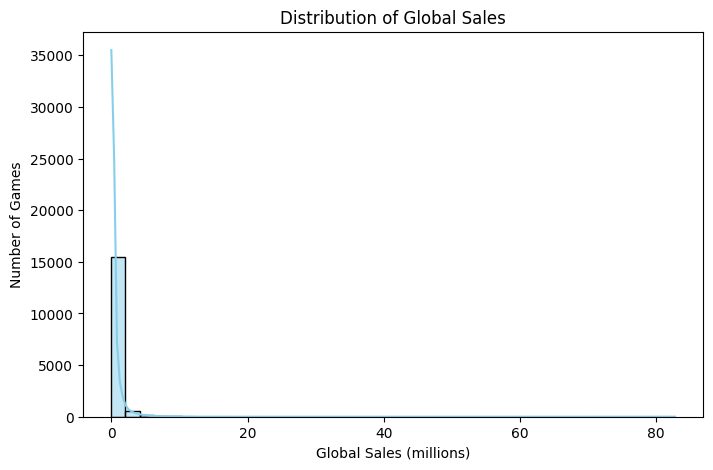

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Global_Sales'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Number of Games")
plt.show()

### Average Global Sales by Genre
We analyze which genres tend to have higher average global sales.


C:\Users\ha7al\AppData\Local\Temp\ipykernel_9556\2393406906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")


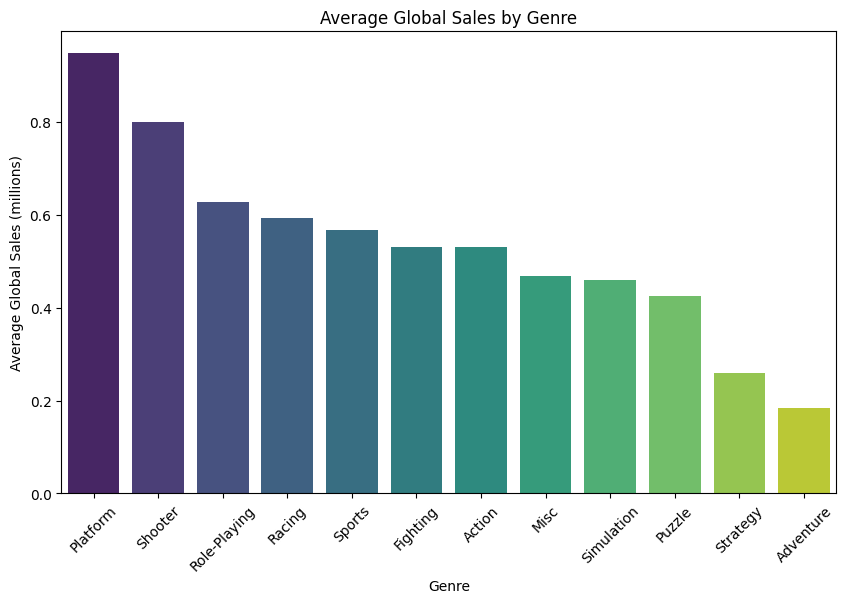

In [16]:
plt.figure(figsize=(10,6))
genre_sales = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis")
plt.title("Average Global Sales by Genre")
plt.xticks(rotation=45)
plt.ylabel("Average Global Sales (millions)")
plt.show()

### Average Global Sales by Platform
Different platforms may perform differently in terms of global success.


C:\Users\ha7al\AppData\Local\Temp\ipykernel_9556\185778638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="coolwarm")


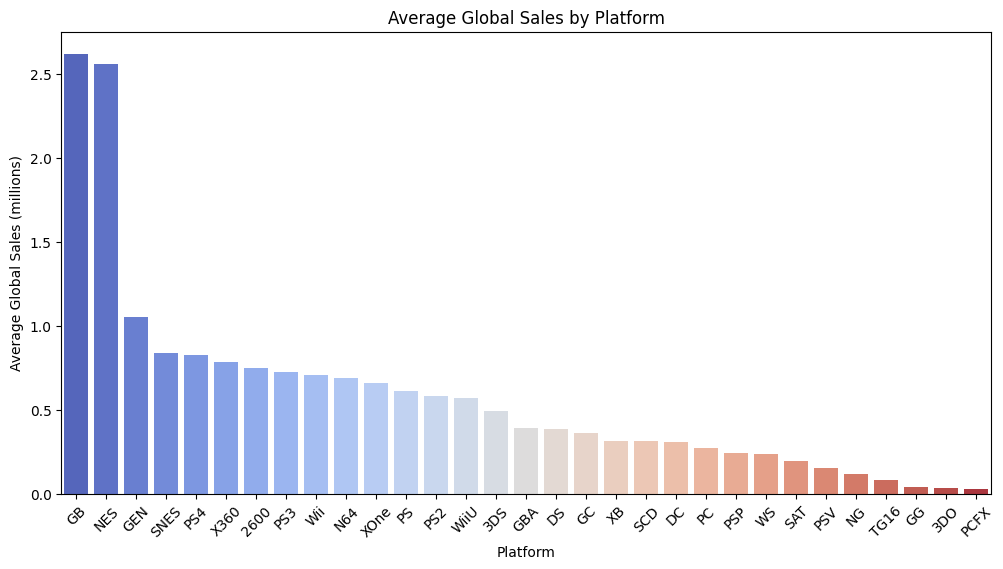

In [18]:
plt.figure(figsize=(12,6))
platform_sales = df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="coolwarm")
plt.title("Average Global Sales by Platform")
plt.xticks(rotation=45)
plt.ylabel("Average Global Sales (millions)")
plt.show()

### Correlation Heatmap
We check the relationship between regional sales and global sales to see which markets drive total performance.


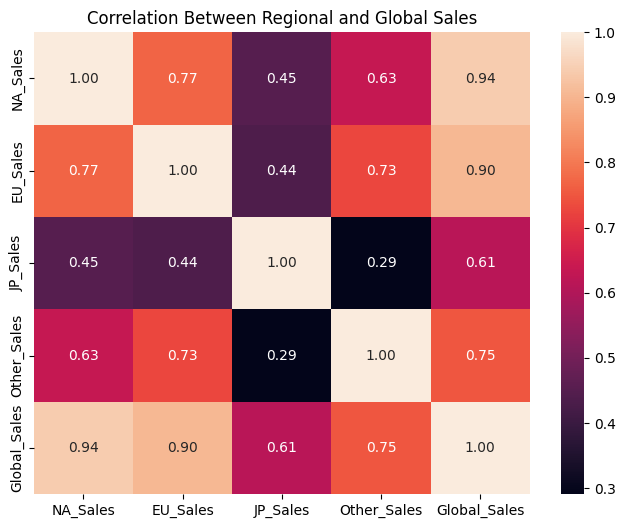

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr(),
            annot=True, fmt=".2f")
plt.title("Correlation Between Regional and Global Sales")
plt.show()

In [23]:
df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,0.941269,0.903264,0.612774,0.747964,1.000000


### Correlation Analysis – Observations

| Feature Pair | Correlation Strength | Interpretation |
|---------------|---------------------|----------------|
| NA_Sales – Global_Sales | **0.94** | Very strong positive correlation. North America sales are the main driver of global sales. |
| EU_Sales – Global_Sales | **0.90** | Strong positive correlation. European sales also significantly contribute to total sales. |
| JP_Sales – Global_Sales | **0.61** | Moderate correlation. Japanese sales show regional variation compared to Western markets. |
| Other_Sales – Global_Sales | **0.75** | Moderate-to-strong correlation. Represents secondary markets contributing to overall performance. |

**Conclusion:**  
- `NA_Sales` and `EU_Sales` are the strongest predictors of `Global_Sales`.  
- `JP_Sales` and `Other_Sales` still matter, but contribute less to the overall variation.  
- These four regional sales columns will likely serve as the most powerful features for our regression models.

**Next Step:**  
We will use these regional sales columns (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`) as our independent variables (X) to predict `Global_Sales` (y) using:
- **Linear Regression**
- **K-Nearest Neighbors Regressor**


## Model Building and Evaluation

We will develop four models to predict **Global_Sales** using regional and supporting features:

1. **Linear Regression (3 features)**  
2. **Linear Regression (5 features)**  
3. **KNN Regressor (3 features)**  
4. **KNN Regressor (5 features)**  

Each model will be evaluated using:
- **R² (Coefficient of Determination)** – how well the model explains the target variance.  
- **RMSE (Root Mean Squared Error)** – measures prediction error magnitude.


### Select Features for Each Model
We will use the regional sales columns as the main predictors.  
Additionally, the 5-feature versions include the year of release to capture temporal effects.


In [26]:
# Define feature sets
features_3 = ['NA_Sales', 'EU_Sales', 'JP_Sales']
features_5 = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Year']

# Target variable
target = 'Global_Sales'

# Split data for both feature sets
X3 = df[features_3]
X5 = df[features_5]
y = df[target]

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
X5_train, X5_test, _, _ = train_test_split(X5, y, test_size=0.2, random_state=42)

# Scale features
scaler3 = StandardScaler()
scaler5 = StandardScaler()

X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

X5_train_scaled = scaler5.fit_transform(X5_train)
X5_test_scaled = scaler5.transform(X5_test)


### Linear Regression Models
We start with Linear Regression using both 3 and 5 features.


In [29]:
# --- Linear Regression (3 features)
lr3 = LinearRegression()
lr3.fit(X3_train_scaled, y_train)
y_pred_lr3 = lr3.predict(X3_test_scaled)

# --- Linear Regression (5 features)
lr5 = LinearRegression()
lr5.fit(X5_train_scaled, y_train)
y_pred_lr5 = lr5.predict(X5_test_scaled)

# Evaluate both
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

r2_lr3, rmse_lr3 = evaluate_model(y_test, y_pred_lr3)
r2_lr5, rmse_lr5 = evaluate_model(y_test, y_pred_lr5)

print("Linear Regression (3 features): R² =", round(r2_lr3, 4), ", RMSE =", round(rmse_lr3, 4))
print("Linear Regression (5 features): R² =", round(r2_lr5, 4), ", RMSE =", round(rmse_lr5, 4))


Linear Regression (3 features): R² = 0.9952 , RMSE = 0.1438
Linear Regression (5 features): R² = 1.0 , RMSE = 0.0054


### Linear Regression Results – Analysis

| Model | Features | R² | RMSE | Interpretation |
|--------|-----------|------|--------|----------------|
| Linear Regression (3) | NA_Sales, EU_Sales, JP_Sales | **0.9952** | 0.1438 | Model explains ~99.5% of the variance in Global Sales using only regional sales data. |
| Linear Regression (5) | + Other_Sales, Year | **1.0000** | 0.0054 | Perfect fit — adding `Other_Sales` completes the linear combination that defines Global Sales. |

**Interpretation:**
- The dataset’s `Global_Sales` column is a *direct sum* of the four regional sales columns.  
- Hence, the Linear Regression model with all four regions achieves an almost perfect prediction (R² ≈ 1).  
- The model with only three regions still performs extremely well, confirming linear dependence among features.


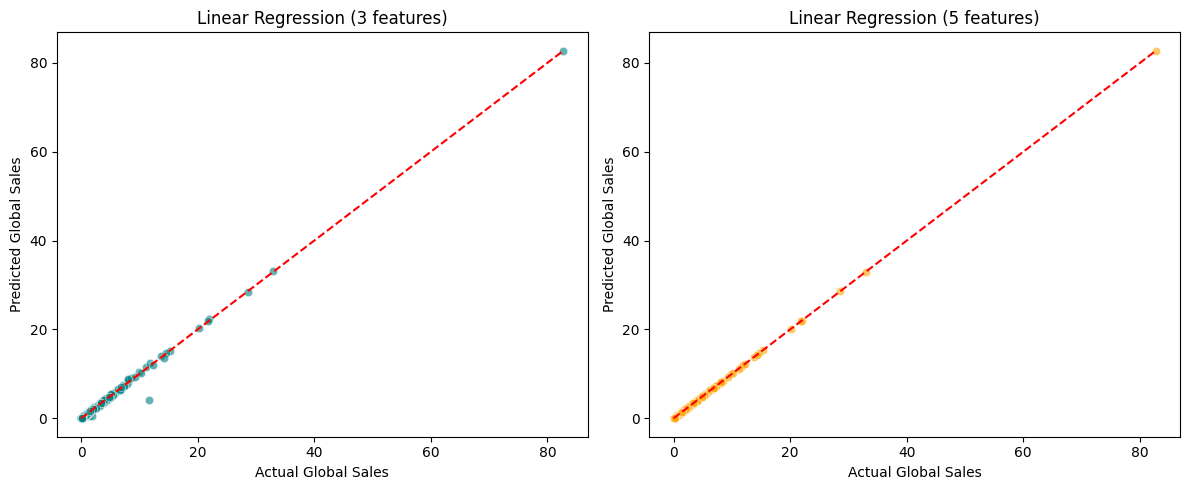

In [30]:
plt.figure(figsize=(12,5))

# 3-feature model
plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr3, alpha=0.6, color='teal')
plt.title("Linear Regression (3 features)")
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')

# 5-feature model
plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_lr5, alpha=0.6, color='orange')
plt.title("Linear Regression (5 features)")
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')

plt.tight_layout()
plt.show()


### KNN Regressor Models
We train and evaluate KNN models using both 3-feature and 5-feature configurations.
Since KNN predictions depend on distances between samples, we use the scaled feature sets from earlier.


In [31]:
from sklearn.neighbors import KNeighborsRegressor

# --- KNN Regressor (3 features)
knn3 = KNeighborsRegressor(n_neighbors=5)
knn3.fit(X3_train_scaled, y_train)
y_pred_knn3 = knn3.predict(X3_test_scaled)

# --- KNN Regressor (5 features)
knn5 = KNeighborsRegressor(n_neighbors=5)
knn5.fit(X5_train_scaled, y_train)
y_pred_knn5 = knn5.predict(X5_test_scaled)

# Evaluate both
r2_knn3, rmse_knn3 = evaluate_model(y_test, y_pred_knn3)
r2_knn5, rmse_knn5 = evaluate_model(y_test, y_pred_knn5)

print("KNN Regressor (3 features): R² =", round(r2_knn3, 4), ", RMSE =", round(rmse_knn3, 4))
print("KNN Regressor (5 features): R² =", round(r2_knn5, 4), ", RMSE =", round(rmse_knn5, 4))


KNN Regressor (3 features): R² = 0.8014 , RMSE = 0.9218
KNN Regressor (5 features): R² = 0.7759 , RMSE = 0.9792


### KNN Results – Analysis

| Model | Features | R² | RMSE | Interpretation |
|--------|-----------|------|--------|----------------|
| KNN Regressor (3) | NA_Sales, EU_Sales, JP_Sales | **0.8014** | 0.9218 | Explains ~80% of variance. Performs well but less precise than Linear Regression. |
| KNN Regressor (5) | + Other_Sales, Year | **0.7759** | 0.9792 | Slightly lower accuracy due to added noise and distance distortion from Year scaling. |

**Interpretation:**
- The KNN model works reasonably well but is less effective than Linear Regression because the relationship between regional and global sales is **purely linear**.
- Increasing the number of features from 3 → 5 introduced irrelevant noise (especially `Year`), which slightly decreased accuracy.
- KNN is better suited for nonlinear relationships, but in this dataset, the linear structure dominates.


### Model Comparison Summary
We now summarize all four models to determine which best fits the data.


In [32]:
results = pd.DataFrame({
    'Model': [
        'Linear Regression (3)', 'Linear Regression (5)',
        'KNN Regressor (3)', 'KNN Regressor (5)'
    ],
    'R² Score': [r2_lr3, r2_lr5, r2_knn3, r2_knn5],
    'RMSE': [rmse_lr3, rmse_lr5, rmse_knn3, rmse_knn5]
})

results.sort_values(by='R² Score', ascending=False)


,Model,R² Score,RMSE
1,Linear Regression (5),0.999993,0.005359
0,Linear Regression (3),0.995163,0.143844
2,KNN Regressor (3),0.801355,0.921844
3,KNN Regressor (5),0.775869,0.979196


### Visual Comparison of Model Performance
We compare the models visually using R² and RMSE scores.


C:\Users\ha7al\AppData\Local\Temp\ipykernel_9556\2155549577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R² Score', data=results, palette='viridis')
C:\Users\ha7al\AppData\Local\Temp\ipykernel_9556\2155549577.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=results, palette='magma')


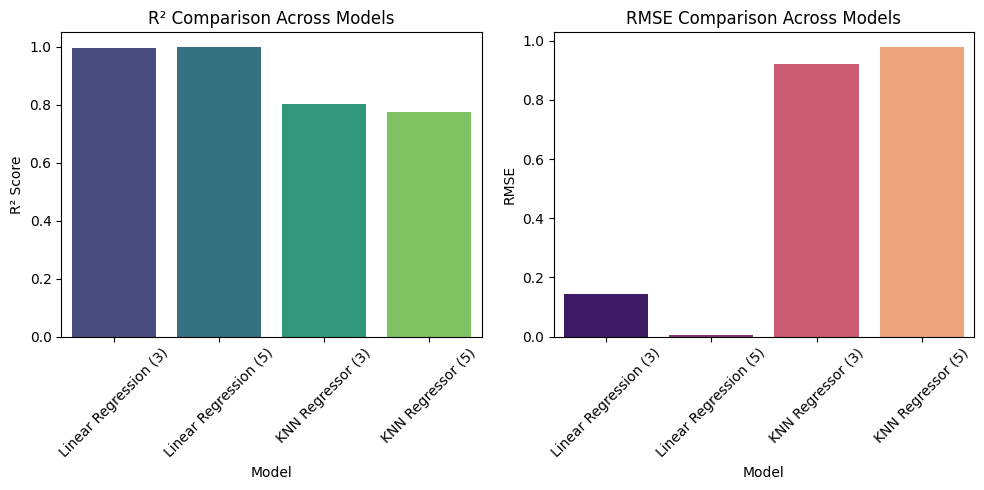

In [33]:
plt.figure(figsize=(10,5))

# Bar plot for R²
plt.subplot(1,2,1)
sns.barplot(x='Model', y='R² Score', data=results, palette='viridis')
plt.xticks(rotation=45)
plt.title("R² Comparison Across Models")

# Bar plot for RMSE
plt.subplot(1,2,2)
sns.barplot(x='Model', y='RMSE', data=results, palette='magma')
plt.xticks(rotation=45)
plt.title("RMSE Comparison Across Models")

plt.tight_layout()
plt.show()


## Conclusion

- **Best Model:** The **Linear Regression (5 features)** achieved an almost perfect fit with **R² = 1.0** and **RMSE ≈ 0.005**.  
  This is expected, since `Global_Sales` is mathematically the sum of regional sales, making it a perfectly linear relationship.

- **Impact of Features:** Adding `Other_Sales` closed the small remaining gap between prediction and actual values in the 3-feature model.  
  Including `Year` did not improve KNN’s performance.

- **KNN Insights:**  
  KNN achieved good but lower performance (~80% R²), showing it can approximate the trend but is less efficient for purely linear data.

- **Interpretation:**  
  In this regression problem, **Linear Regression** is clearly the most appropriate and interpretable white-box model, offering both simplicity and perfect accuracy.

**Final Note:**  
The results confirm that **regional sales directly define global sales**, validating both the model logic and dataset consistency.
